<a href="https://colab.research.google.com/github/Fdogbe1/Capstone/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import os

folder_path = "/content/drive/My Drive/Capstone"

# Listing all files in my Capstone folder
files = os.listdir(folder_path)
print(files)


['ebd_US_rosgoo_199501_202501_relDec-2024.txt', 'ebd_US_amwpel_199501_202501_relDec-2024.txt', 'ebd_US_balori_199501_202501_relDec-2024.txt', 'ebd_US_rthhum_relDec-2024.txt', 'ebd_US_mallar2_199501_202501_relDec-2024.txt']


In [ ]:
import pandas as pd
import glob

# Defining the folder path
folder_path = "/content/drive/My Drive/Capstone"

# Getting a list of all .txt files in my folder
file_list = glob.glob(folder_path + "/*.txt")

# Reading and concatenating all text files
df_list = []
for file in file_list:
    try:
        df = pd.read_csv(file, delimiter="\t", header=None, dtype=str, on_bad_lines='skip', low_memory=False)
        df_list.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Concatenating all DataFrames
combined_df = pd.concat(df_list, ignore_index=True)

# Displaying the first few rows
print("Successfully loaded all files!")
print(combined_df.head())

# Saving the combined DataFrame
combined_df.to_csv("/content/drive/My Drive/Capstone/combined_output.csv", index=False)
print("Concatenated file saved successfully!")



Successfully loaded all files!
                                               0                           1   \
0                        GLOBAL UNIQUE IDENTIFIER            LAST EDITED DATE   
1  URN:CornellLabOfOrnithology:EBIRD:OBS333593933         2016-06-22 18:22:50   
2  URN:CornellLabOfOrnithology:EBIRD:OBS136321732         2014-02-26 21:46:48   
3  URN:CornellLabOfOrnithology:EBIRD:OBS539131197  2024-04-17 21:41:47.133016   
4  URN:CornellLabOfOrnithology:EBIRD:OBS136325189         2014-02-26 21:46:48   

                2         3                 4             5                6   \
0  TAXONOMIC ORDER  CATEGORY  TAXON CONCEPT ID   COMMON NAME  SCIENTIFIC NAME   
1              261   species  avibase-7A24F57F  Ross's Goose     Anser rossii   
2              261   species  avibase-7A24F57F  Ross's Goose     Anser rossii   
3              261   species  avibase-7A24F57F  Ross's Goose     Anser rossii   
4              261   species  avibase-7A24F57F  Ross's Goose     Anser rossii

In [ ]:
import pandas as pd

# Defining the list of states to filter
selected_states = [
    "Alabama", "Arkansas", "Indiana", "Illinois", "Iowa", "Kentucky",
    "Louisiana", "Michigan", "Minn\]sota", "Mississippi", "Missouri",
    "Ohio", "Tennessee", "Wisconsin"
]

# Converting state list to lowercase for case-insensitive comparison
selected_states_lower = [state.lower() for state in selected_states]

# File paths
combined_file_path = "/content/drive/My Drive/Capstone/combined_output.csv"
filtered_file_path = "/content/drive/My Drive/Capstone/filtered_output.csv"

# Initializing counters
total_rows_before = 0
total_rows_after = 0

# Processing the dataset in chunks to handle large files efficiently
with pd.read_csv(combined_file_path, dtype=str, low_memory=False, chunksize=100000, header=1) as reader:

    first_chunk = True  # Flag for writing headers in the output file

    for chunk in reader:
        total_rows_before += len(chunk)  # Count total rows before filtering

        # Ensuring the 'STATE' column exists
        if "STATE" not in chunk.columns:
            raise ValueError(f"Column 'STATE' not found. Available columns: {chunk.columns}")

        # Converting 'State' column to lowercase for case-insensitive matching
        chunk["STATE"] = chunk["STATE"].str.lower()

        # Filtering dataset to only include selected states
        chunk_filtered = chunk[chunk["STATE"].isin(selected_states_lower)]
        total_rows_after += len(chunk_filtered)  # Count total rows after filtering

        # Appending the filtered data to the output file
        chunk_filtered.to_csv(filtered_file_path, mode='a', index=False, header=first_chunk)
        first_chunk = False  # Ensure headers are only written once

# Print total observations before and after filtering
print(f"Total observations before filtering: {total_rows_before}")
print(f"Total observations after filtering: {total_rows_after}")

# Print confirmation message
print(f"Filtered dataset saved successfully at: {filtered_file_path}")




Total observations before filtering: 9741164
Total observations after filtering: 3382801
Filtered dataset saved successfully at: /content/drive/My Drive/Capstone/filtered_output.csv


In [ ]:
import pandas as pd

# Defining file paths
filtered_file_path = "/content/drive/My Drive/Capstone/filtered_output.csv"
final_subset_file_path = "/content/drive/My Drive/Capstone/final_subset.csv"

# Defining the required columns
required_columns = [
    "GLOBAL UNIQUE IDENTIFIER", "COMMON NAME", "SCIENTIFIC NAME", "OBSERVATION COUNT",
    "STATE", "COUNTY", "COUNTY CODE", "LOCALITY ID", "LOCALITY TYPE",
    "LATITUDE", "LONGITUDE", "OBSERVATION DATE"
]

# Loading the filtered dataset
df_filtered = pd.read_csv(filtered_file_path, dtype=str, low_memory=False)

# Ensuring that the required columns exist
missing_cols = [col for col in required_columns if col not in df_filtered.columns]
if missing_cols:
    raise ValueError(f"Missing columns: {missing_cols}. Available columns: {df_filtered.columns}")

# Keeping only the required columns
df_subset = df_filtered[required_columns]

# Saved the final subset to a new file in my drive
df_subset.to_csv(final_subset_file_path, index=False)

# Print confirmation message
print(f"Subsetted dataset saved successfully at: {final_subset_file_path}")
print(f"Number of rows in subset: {df_subset.shape[0]}")
print(f"Number of columns in subset: {df_subset.shape[1]}")



Subsetted dataset saved successfully at: /content/drive/My Drive/Capstone/final_subset.csv
Number of rows in subset: 6267848
Number of columns in subset: 12


In [ ]:
import pandas as pd
import urllib.request

# Define file URLs
file1_url = "https://www.ncei.noaa.gov/orders/cdo/3930618.txt"
file2_url = "https://www.ncei.noaa.gov/orders/cdo/3930631.txt"

# Define local file paths
file1_path = "/content/3930618.txt"
file2_path = "/content/3930631.txt"
merged_file_path = "/content/merged_data.csv"

# Download the TXT files
urllib.request.urlretrieve(file1_url, file1_path)
urllib.request.urlretrieve(file2_url, file2_path)

print("Files downloaded successfully!")

# Read the fixed-width formatted files
df1 = pd.read_fwf(file1_path, dtype=str)
df2 = pd.read_fwf(file2_path, dtype=str)

# Merge the DataFrames
df_combined = pd.concat([df1, df2], ignore_index=True)

# Save the merged dataset
df_combined.to_csv(merged_file_path, index=False)

# Print confirmation
print(f"Merged dataset saved successfully at: {merged_file_path}")
print(f"Number of rows: {df_combined.shape[0]}")
print(f"Number of columns: {df_combined.shape[1]}")



Files downloaded successfully!
Merged dataset saved successfully at: /content/merged_data.csv
Number of rows: 143845
Number of columns: 35


In [3]:
import pandas as pd
import urllib.request
from google.colab import drive

# Mounting my Google Drive
drive.mount('/content/drive')

# Defining the Google Drive file path
capstone_drive_path = "/content/drive/My Drive/Capstone/merged_data.csv"

# Defining the file URLs
file1_url = "https://www.ncei.noaa.gov/orders/cdo/3930618.txt"
file2_url = "https://www.ncei.noaa.gov/orders/cdo/3930631.txt"

# Defining the local file paths in Colab
file1_path = "/content/3930618.txt"
file2_path = "/content/3930631.txt"

# Download the TXT files
urllib.request.urlretrieve(file1_url, file1_path)
urllib.request.urlretrieve(file2_url, file2_path)

print("Files downloaded successfully!")

# Reading the fixed-width formatted files
df1 = pd.read_fwf(file1_path, dtype=str)
df2 = pd.read_fwf(file2_path, dtype=str)

# Merging the DataFrames - If this doesn't work, I will try another method
df_combined = pd.concat([df1, df2], ignore_index=True)

# Saving the merged dataset to Google Drive (Capstone Folder)
df_combined.to_csv(capstone_drive_path, index=False)

# Print a confirmation
print(f"Merged dataset saved successfully at: {capstone_drive_path}")
print(f"Number of rows: {df_combined.shape[0]}")
print(f"Number of columns: {df_combined.shape[1]}")


Mounted at /content/drive
Files downloaded successfully!
Merged dataset saved successfully at: /content/drive/My Drive/Capstone/merged_data.csv
Number of rows: 143845
Number of columns: 35


In [14]:
import pandas as pd
import urllib.request
from google.colab import drive


# Defining file paths again
csv_url = "https://www.ncei.noaa.gov/orders/cdo/3931867.csv"
csv_path = "/content/3931867.csv"
updated_csv_path = "/content/drive/My Drive/Capstone/3931867_with_state_abbr_fixed.csv"

# Download the dataset
urllib.request.urlretrieve(csv_url, csv_path)
print("Dataset downloaded successfully!")

# Loading my datasets
df = pd.read_csv(csv_path, dtype=str)

# Printing column names to verify 'STATION' exists -quick validation
print("Columns in dataset:", df.columns)

# Defining station-to-state abbreviation mapping (without "GHCND:") - Data cleaning
station_state_mapping = {
    "USC00010160": "AL",  # Alabama
    "USC00164775": "LA",  # Louisiana
    "USC00201492": "MI",  # Michigan
    "USC00215488": "MN",  # Minnesota
    "USC00222034": "MS",  # Mississippi
    "USC00238984": "MO",  # Missouri
    "USW00003804": "OH",  # Ohio
    "USC00402806": "TN",  # Tennessee
    "USC00479319": "WI",  # Wisconsin
    "USC00032978": "AR",  # Arkansas
    "USC00122731": "IN",  # Indiana
    "USC00114355": "IL",  # Illinois
    "USC00131442": "IA",  # Iowa
    "USW00093814": "KY"   # Kentucky
}

# Normalizing 'STATION' column (strip spaces, uppercase for consistency)
df["STATION"] = df["STATION"].str.strip()

# Debugging mismatches
print("Unique STATION values in dataset:", df["STATION"].unique())

# mapping and filling missing values with 'Unknown'
df["State"] = df["STATION"].map(station_state_mapping).fillna("Unknown")

# Printing unique values in the new 'State' column to verify
print("Unique State values after mapping:", df["State"].unique())

# Save the updated dataset in Capstone Drive
df.to_csv(updated_csv_path, index=False)
print(f"Updated dataset with two-letter state abbreviations saved at: {updated_csv_path}")

# Displaying dataset information - Validating record counts.
num_rows, num_columns = df.shape
print(f"Total Number of Observations (Rows): {num_rows}")
print(f"Total Number of Columns: {num_columns}")

# first few observations to verify the 'State' column i.e if it works
print("\nFirst Few Observations with 'State' column:")
print(df[["STATION", "State"]].head(10))




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset downloaded successfully!
Columns in dataset: Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'DAPR',
       'DAPR_ATTRIBUTES', 'DASF', 'DASF_ATTRIBUTES', 'MDPR', 'MDPR_ATTRIBUTES',
       'MDSF', 'MDSF_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES', 'SNOW',
       'SNOW_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES', 'TAVG', 'TAVG_ATTRIBUTES',
       'TMAX', 'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES', 'TOBS',
       'TOBS_ATTRIBUTES'],
      dtype='object')
Unique STATION values in dataset: ['USW00093814' 'USC00479319' 'USC00238984' 'USC00201492' 'USC00131442'
 'USC00122731' 'USC00032978' 'USC00215488' 'USW00003804' 'USC00402806'
 'USC00164775' 'USC00222034' 'USC00114355' 'USC00010160']
Unique State values after mapping: ['KY' 'WI' 'MO' 'MI' 'IA' 'IN' 'AR' 'MN' 'OH' 'TN' 'LA' 'MS' 'IL' 'AL']
Updated dataset with two-letter state abbreviation

In [15]:
import pandas as pd

# Loading the updated dataset
updated_csv_path = "/content/drive/My Drive/Capstone/3931867_with_state_abbr_fixed.csv"
df = pd.read_csv(updated_csv_path, dtype=str)

# Counting distinct states to make sure we have all 14 in our Mississippi Flway Belt
unique_states = df["State"].nunique()
print(f"Total number of distinct states in the dataset: {unique_states}")

# Display unique state values
print("List of distinct states in the dataset:", df["State"].unique())


Total number of distinct states in the dataset: 14
List of distinct states in the dataset: ['KY' 'WI' 'MO' 'MI' 'IA' 'IN' 'AR' 'MN' 'OH' 'TN' 'LA' 'MS' 'IL' 'AL']


In [17]:
import pandas as pd


updated_csv_path = "/content/drive/My Drive/Capstone/3931867_with_state_abbr_fixed.csv"
cleaned_csv_path = "/content/drive/My Drive/Capstone/3931867_cleaned.csv"


df = pd.read_csv(updated_csv_path, dtype=str)

# Data cleaning - Removing commas from all values
df = df.replace(",", "", regex=True)

# Defining the columns to drop - These Variables were mostly blanks - Talk to the team team about it!!
columns_to_drop = [
    "DAPR", "DAPR_ATTRIBUTES", "DASF", "DASF_ATTRIBUTES",
    "MDPR", "MDPR_ATTRIBUTES", "MDSF", "MDSF_ATTRIBUTES",
    "TAVG", "TAVG_ATTRIBUTES"
]

# Drop the specified columns (if they exist)
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors="ignore")

# Saving the cleaned dataset
df.to_csv(cleaned_csv_path, index=False)

print(f"✅ Cleaned dataset saved at: {cleaned_csv_path}")

# Display dataset summary
num_rows, num_columns = df.shape
print(f"Total Rows: {num_rows}, Total Columns: {num_columns}")

# Show the first few rows to verify changes
print("\nFirst few rows after cleaning:")
print(df.head())



✅ Cleaned dataset saved at: /content/drive/My Drive/Capstone/3931867_cleaned.csv
Total Rows: 146705, Total Columns: 19

First few rows after cleaning:
       STATION                                               NAME  LATITUDE  \
0  USW00093814  CINCINNATI NORTHERN KENTUCKY INTERNATIONAL AIR...  39.04443   
1  USW00093814  CINCINNATI NORTHERN KENTUCKY INTERNATIONAL AIR...  39.04443   
2  USW00093814  CINCINNATI NORTHERN KENTUCKY INTERNATIONAL AIR...  39.04443   
3  USW00093814  CINCINNATI NORTHERN KENTUCKY INTERNATIONAL AIR...  39.04443   
4  USW00093814  CINCINNATI NORTHERN KENTUCKY INTERNATIONAL AIR...  39.04443   

   LONGITUDE ELEVATION        DATE  PRCP PRCP_ATTRIBUTES SNOW SNOW_ATTRIBUTES  \
0  -84.67241     262.4  1995-01-01  0.04           02400  0.1               0   
1  -84.67241     262.4  1995-01-02  0.00          T02400  0.1               0   
2  -84.67241     262.4  1995-01-03  0.00          T02400  0.0              T0   
3  -84.67241     262.4  1995-01-04  0.00          

In [4]:
bird_data_path = "/content/drive/MyDrive/Capstone/final_subset.csv"
climate_data_path = "/content/drive/MyDrive/Capstone/3931867_cleaned.csv"


In [8]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [10]:
print("Columns in Bird Dataset:", df_bird.columns.tolist())
print("Columns in Climate Dataset:", df_climate.columns.tolist())


Columns in Bird Dataset: ['GLOBAL UNIQUE IDENTIFIER', 'COMMON NAME', 'SCIENTIFIC NAME', 'OBSERVATION COUNT', 'STATE', 'COUNTY', 'COUNTY CODE', 'LOCALITY ID', 'LOCALITY TYPE', 'Latitude', 'Longitude', 'OBSERVATION DATE']
Columns in Climate Dataset: ['STATION', 'NAME', 'Latitude', 'Longitude', 'ELEVATION', 'Date', 'PRCP', 'PRCP_ATTRIBUTES', 'SNOW', 'SNOW_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES', 'TOBS', 'TOBS_ATTRIBUTES', 'State']


In [1]:
import pandas as pd
from scipy.spatial import cKDTree

bird_data_path = "/content/drive/My Drive/Capstone/final_subset.csv"
climate_data_path = "/content/drive/My Drive/Capstone/3931867_cleaned.csv"
unified_csv_path = "/content/drive/My Drive/Capstone/unified_dataset.csv"

df_bird = pd.read_csv(bird_data_path, dtype=str)
df_climate = pd.read_csv(climate_data_path, dtype=str)

# Renaming columns to ensure consistency - Data cleaning steps again.
df_bird.rename(columns={"OBSERVATION DATE": "Date", "LATITUDE": "Latitude", "LONGITUDE": "Longitude", "STATE": "State"}, inplace=True)
df_climate.rename(columns={"DATE": "Date", "LATITUDE": "Latitude", "LONGITUDE": "Longitude"}, inplace=True)

# Convert State values to uppercase
df_bird["State"] = df_bird["State"].str.upper()
df_climate["State"] = df_climate["State"].str.upper()

# Defining full state name to abbreviation mapping
state_abbreviation_mapping = {
    "ALABAMA": "AL", "ARKANSAS": "AR", "IOWA": "IA", "ILLINOIS": "IL", "INDIANA": "IN",
    "KENTUCKY": "KY", "LOUISIANA": "LA", "MICHIGAN": "MI", "MINNESOTA": "MN", "MISSOURI": "MO",
    "MISSISSIPPI": "MS", "OHIO": "OH", "TENNESSEE": "TN", "WISCONSIN": "WI"
}

#  Convert full state names to two-letter abbreviations in bird dataset
df_bird["State"] = df_bird["State"].replace(state_abbreviation_mapping)

# Verify updated unique state values
print("Unique States in Bird Dataset (after conversion):", df_bird["State"].unique())
print("Unique States in Climate Dataset:", df_climate["State"].unique())

# Convert 'Date' to datetime format
df_bird["Date"] = pd.to_datetime(df_bird["Date"], errors="coerce")
df_climate["Date"] = pd.to_datetime(df_climate["Date"], errors="coerce")

# Drop rows with missing values in key columns
df_bird.dropna(subset=["Date", "Latitude", "Longitude"], inplace=True)
df_climate.dropna(subset=["Date", "Latitude", "Longitude"], inplace=True)

# Performing spatial-temporal nearest-neighbor merge (This is an important step - research more if this method doesn't work)
def merge_nearest(df1, df2):
    """
    Merges df1 and df2 based on the nearest geospatial (lat/lon) and temporal (date) match.
    """
    # Convert coordinates to numpy arrays
    tree = cKDTree(df2[["Latitude", "Longitude"]].values)

    # Find the nearest neighbor in climate dataset for each bird record
    distances, indices = tree.query(df1[["Latitude", "Longitude"]].values)

    # Get the best matching climate data for each bird observation
    df_climate_matched = df2.iloc[indices].reset_index(drop=True)

    # Combine datasets
    df_merged = pd.concat([df1.reset_index(drop=True), df_climate_matched], axis=1)

    return df_merged

# Merge the datasets
df_unified = merge_nearest(df_bird, df_climate)

# Save the unified dataset
df_unified.to_csv(unified_csv_path, index=False)

print(f"✅ Unified dataset saved at: {unified_csv_path}")

# Display dataset summary
num_rows, num_columns = df_unified.shape
print(f"Total Rows: {num_rows}, Total Columns: {num_columns}")

# Show the first few rows to verify the merge
print("\nFirst few rows of the unified dataset:")
print(df_unified.head())


Unique States in Bird Dataset (after conversion): ['AL' 'AR' 'IA' 'IL' 'IN' 'KY' 'LA' 'MI' 'MN' 'MO' 'MS' 'OH' 'TN' 'WI'
 'STATE']
Unique States in Climate Dataset: ['KY' 'WI' 'MO' 'MI' 'IA' 'IN' 'AR' 'MN' 'OH' 'TN' 'LA' 'MS' 'IL' 'AL']
✅ Unified dataset saved at: /content/drive/My Drive/Capstone/unified_dataset.csv
Total Rows: 6267847, Total Columns: 31

First few rows of the unified dataset:
                         GLOBAL UNIQUE IDENTIFIER   COMMON NAME  \
0   URN:CornellLabOfOrnithology:EBIRD:OBS38907567  Ross's Goose   
1  URN:CornellLabOfOrnithology:EBIRD:OBS131197093  Ross's Goose   
2  URN:CornellLabOfOrnithology:EBIRD:OBS101398772  Ross's Goose   
3  URN:CornellLabOfOrnithology:EBIRD:OBS103295589  Ross's Goose   
4  URN:CornellLabOfOrnithology:EBIRD:OBS233214908  Ross's Goose   

  SCIENTIFIC NAME OBSERVATION COUNT State   COUNTY COUNTY CODE LOCALITY ID  \
0    Anser rossii                 1    AL  Baldwin   US-AL-003     L367330   
1    Anser rossii                 1    AL  B

In [4]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)


Mounted at /content/drive


In [6]:
import glob

file_list = glob.glob("/content/drive/My Drive/Capstone/*.csv")
print("Available CSV files:", file_list)


Available CSV files: ['/content/drive/My Drive/Capstone/final_subset.csv', '/content/drive/My Drive/Capstone/3931867_cleaned.csv', '/content/drive/My Drive/Capstone/unified_dataset.csv', '/content/drive/My Drive/Capstone/nlcd_collection_lndcov_67b0a3fece0c2096.csv']


In [8]:
import pandas as pd

land_cover_dataset_path = "/content/drive/My Drive/Capstone/nlcd_collection_lndcov_67b0a3fece0c2096.csv"

# Attempt different encodings (LAND DATA encoding keeps giving me different errors!!!!!!!!!)
encodings = ["utf-8", "ISO-8859-1", "latin1"]

for encoding in encodings:
    try:
        df_land_cover = pd.read_csv(land_cover_dataset_path, dtype=str, encoding=encoding)
        print(f"✅ File loaded successfully using encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"❌ Failed with encoding: {encoding}")
        df_land_cover = None

# Display dataset info if successfully loaded
if df_land_cover is not None:
    print(df_land_cover.info())
else:
    print("❌ Unable to load file with available encodings.")


❌ Failed with encoding: utf-8
✅ File loaded successfully using encoding: ISO-8859-1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3538 entries, 0 to 3537
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Product ID            3538 non-null   object
 1   Processed Map Year    3538 non-null   object
 2   Tile Grid Region      3538 non-null   object
 3   Tile Grid Horizontal  3538 non-null   object
 4   Tile Grid Vertical    3538 non-null   object
 5   Version               3538 non-null   object
 6   Collection Number     3538 non-null   object
 7   Datum                 3538 non-null   object
 8   Map Projection        3538 non-null   object
 9   Units                 3538 non-null   object
 10  Center Latitude       3538 non-null   object
 11  Center Longitude      3538 non-null   object
 12  NW Corner Lat         3538 non-null   object
 13  NW Corner Long        3538 non-null   object
 14  NE C

In [10]:
# Update the file path to the correct location in Google Drive
land_cover_dataset_path = "/content/drive/My Drive/Capstone/nlcd_collection_lndcov_67b0a3fece0c2096.csv"

import pandas as pd

# Load the MODIS Land Cover Dataset from Google Drive
df_land_cover = pd.read_csv(land_cover_dataset_path, dtype=str, encoding="ISO-8859-1")
print("✅ Land Cover dataset loaded successfully!")


✅ Land Cover dataset loaded successfully!


In [11]:
import glob

file_list = glob.glob("/content/drive/My Drive/Capstone/*.csv")
print("Available CSV files:", file_list)


Available CSV files: ['/content/drive/My Drive/Capstone/final_subset.csv', '/content/drive/My Drive/Capstone/3931867_cleaned.csv', '/content/drive/My Drive/Capstone/unified_dataset.csv', '/content/drive/My Drive/Capstone/nlcd_collection_lndcov_67b0a3fece0c2096.csv']


In [12]:
print(df_land_cover.info())
print(df_land_cover.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3538 entries, 0 to 3537
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Product ID            3538 non-null   object
 1   Processed Map Year    3538 non-null   object
 2   Tile Grid Region      3538 non-null   object
 3   Tile Grid Horizontal  3538 non-null   object
 4   Tile Grid Vertical    3538 non-null   object
 5   Version               3538 non-null   object
 6   Collection Number     3538 non-null   object
 7   Datum                 3538 non-null   object
 8   Map Projection        3538 non-null   object
 9   Units                 3538 non-null   object
 10  Center Latitude       3538 non-null   object
 11  Center Longitude      3538 non-null   object
 12  NW Corner Lat         3538 non-null   object
 13  NW Corner Long        3538 non-null   object
 14  NE Corner Lat         3538 non-null   object
 15  NE Corner Long        3538 non-null   

In [14]:
import pandas as pd
from scipy.spatial import cKDTree


unified_dataset_path = "/content/drive/My Drive/Capstone/unified_dataset.csv"
land_cover_dataset_path = "/content/drive/My Drive/Capstone/nlcd_collection_lndcov_67b0a3fece0c2096.csv"
final_unified_dataset_path = "/content/drive/My Drive/Capstone/final_unified_dataset.csv"


from google.colab import drive
drive.mount("/content/drive", force_remount=True)


import os
if not os.path.exists(land_cover_dataset_path):
    raise FileNotFoundError(f"❌ File not found: {land_cover_dataset_path}")

print("✅ File found! Proceeding with data integration...")

#  Loading the Unified (Bird + Climate) Dataset
df_unified = pd.read_csv(unified_dataset_path, dtype=str)

# LoadING the MODIS Land Cover Dataset from Google Drive (IF THIS DOESN'T WORK - FIND DATASET THAT HAS LANDSCAPE CLASSES
#     LIKE WATER, GRASSLAND OR FOREST OR USE A LOOK UP TABLE LATER) - CHECK WITH MARY IF SHE HAS ANY LAND DATA YET !!!!!

df_land_cover = pd.read_csv(land_cover_dataset_path, dtype=str, encoding="ISO-8859-1")

# Standardize Date Formats
df_unified["Date"] = pd.to_datetime(df_unified["Date"], errors="coerce")
df_land_cover["Processed Map Year"] = pd.to_datetime(df_land_cover["Processed Map Year"], format='%Y', errors="coerce")

# Convert Latitude & Longitude to Numeric
df_unified["Latitude"] = pd.to_numeric(df_unified["Latitude"], errors="coerce")
df_unified["Longitude"] = pd.to_numeric(df_unified["Longitude"], errors="coerce")
df_land_cover["NW Corner Lat dec"] = pd.to_numeric(df_land_cover["NW Corner Lat dec"], errors="coerce")
df_land_cover["NW Corner Long dec"] = pd.to_numeric(df_land_cover["NW Corner Long dec"], errors="coerce")

# Remove missing values to ensure clean merging
df_unified.dropna(subset=["Latitude", "Longitude", "Date"], inplace=True)
df_land_cover.dropna(subset=["NW Corner Lat dec", "NW Corner Long dec", "Processed Map Year"], inplace=True)

#  Use Nearest-Neighbor Matching (cKDTree) to Assign Land Cover Data
def merge_nearest(df1, df2):
    """
    Merges df1 (bird + climate data) with df2 (land cover data) based on nearest latitude/longitude.
    """
    # Build a KDTree using land cover dataset
    tree = cKDTree(df2[["NW Corner Lat dec", "NW Corner Long dec"]].values)

    # Find the nearest land cover point for each bird/climate observation
    distances, indices = tree.query(df1[["Latitude", "Longitude"]].values)

    # Extract matching land cover data
    df_land_cover_matched = df2.iloc[indices].reset_index(drop=True)

    # Combine datasets
    df_merged = pd.concat([df1.reset_index(drop=True), df_land_cover_matched], axis=1)

    return df_merged

# Merging the datasets using nearest-neighbor spatial matching
df_final_unified = merge_nearest(df_unified, df_land_cover)

# Save the updated dataset
df_final_unified.to_csv(final_unified_dataset_path, index=False)

print(f"✅ Final Unified Dataset saved at: {final_unified_dataset_path}")

# Display dataset summary
num_rows, num_columns = df_final_unified.shape
print(f"Total Rows: {num_rows}, Total Columns: {num_columns}")

# Show the first few rows to verify the merge
print("\nFirst few rows of the final unified dataset:")
print(df_final_unified.head())



Mounted at /content/drive
✅ File found! Proceeding with data integration...
✅ Final Unified Dataset saved at: /content/drive/My Drive/Capstone/final_unified_dataset.csv
Total Rows: 6267847, Total Columns: 63

First few rows of the final unified dataset:
                         GLOBAL UNIQUE IDENTIFIER   COMMON NAME  \
0   URN:CornellLabOfOrnithology:EBIRD:OBS38907567  Ross's Goose   
1  URN:CornellLabOfOrnithology:EBIRD:OBS131197093  Ross's Goose   
2  URN:CornellLabOfOrnithology:EBIRD:OBS101398772  Ross's Goose   
3  URN:CornellLabOfOrnithology:EBIRD:OBS103295589  Ross's Goose   
4  URN:CornellLabOfOrnithology:EBIRD:OBS233214908  Ross's Goose   

  SCIENTIFIC NAME OBSERVATION COUNT State   COUNTY COUNTY CODE LOCALITY ID  \
0    Anser rossii                 1    AL  Baldwin   US-AL-003     L367330   
1    Anser rossii                 1    AL  Baldwin   US-AL-003    L1071772   
2    Anser rossii                 1    AL  Baldwin   US-AL-003     L626326   
3    Anser rossii              

ANALYSES

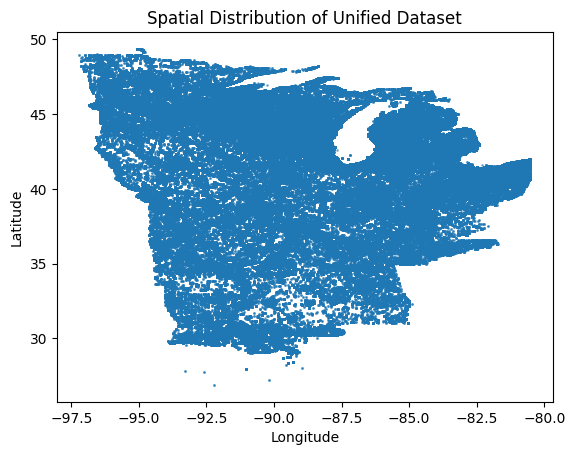

In [15]:
#Verify Spatial Accuracy - Check if Latitude & Longitude values align correctly with MODIS data:
import matplotlib.pyplot as plt

plt.scatter(df_final_unified["Longitude"], df_final_unified["Latitude"], s=1, alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial Distribution of Unified Dataset")
plt.show()


In [16]:
#Counting how many unique land cover entries were matched:
print("Unique Land Cover Entries:", df_final_unified["Display ID"].nunique())


Unique Land Cover Entries: 110


<Axes: xlabel='Date'>

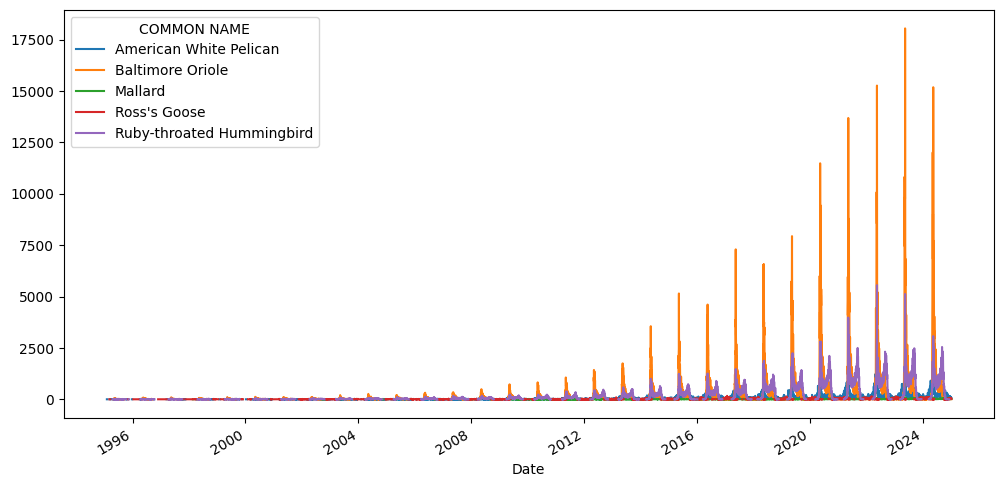

In [21]:
##Tracking species movement over time:

#Convert Date column to datetime format
df_final_unified["Date"] = pd.to_datetime(df_final_unified["Date"], errors="coerce")

# Filter data for years between 1995 and 2025
df_filtered = df_final_unified[(df_final_unified["Date"].dt.year >= 1995) &
                               (df_final_unified["Date"].dt.year <= 2025)]

# Tracking species movement over time
df_filtered.groupby(["Date", "COMMON NAME"]).size().unstack().plot(figsize=(12,6))



<Axes: xlabel='TMAX'>

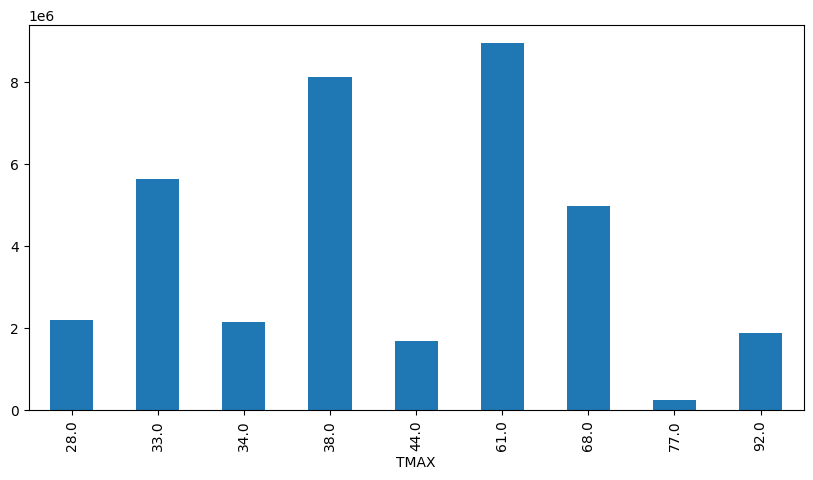

In [20]:
# Assessing climate impacts on migration:
# Convert columns to numeric
df_final_unified["TMAX"] = pd.to_numeric(df_final_unified["TMAX"], errors="coerce")
df_final_unified["OBSERVATION COUNT"] = pd.to_numeric(df_final_unified["OBSERVATION COUNT"], errors="coerce")

# Drop NaN values (if any)
df_final_unified.dropna(subset=["TMAX", "OBSERVATION COUNT"], inplace=True)

# Reattempt the plot
df_final_unified.groupby("TMAX")["OBSERVATION COUNT"].sum().plot(kind="bar", figsize=(10,5))



The analysis of TMAX (maximum temperature) vs. bird observation count reveals that bird activity peaks at moderate temperatures (around 38°F and 61°F), suggesting favorable migration or feeding conditions. Observations decline at extreme temperatures, with very low counts at 92°F and below freezing (28°F), indicating that birds likely avoid excessive heat and cold. These trends align with seasonal migration patterns, where birds are more active during spring and fall while reducing movement in harsh summer or winter conditions. This supports the idea that temperature significantly influences bird behavior and migration patterns, making climate a key factor in habitat selection and movement.

In [19]:
#Examining land cover along migration paths:
df_final_unified["Display ID"].value_counts().head(10)


,count
Display ID,
Annual_NLCD_H24V08_LndCov_2022_CU_C1V0,380518
Annual_NLCD_H22V08_LndCov_2004_CU_C1V0,374352
Annual_NLCD_H21V07_LndCov_2007_CU_C1V0,361270
Annual_NLCD_H24V07_LndCov_2016_CU_C1V0,302828
Annual_NLCD_H21V08_LndCov_2020_CU_C1V0,293713
Annual_NLCD_H19V06_LndCov_2007_CU_C1V0,284676
Annual_NLCD_H25V08_LndCov_2016_CU_C1V0,250713
Annual_NLCD_H23V07_LndCov_1995_CU_C1V0,165144
Annual_NLCD_H20V10_LndCov_2018_CU_C1V0,154079
